In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from random import randint
import random
import calendar
import cmapy

In [2]:
def extract_cont(string):
    for word in string.split():
        if word in ['Asia', 'asia']:
            return 'Asia'
        elif word in ['Europe','europe']:
            return 'Europe'
        elif word in ['USA','US','America','Caribbean','Canada']:
            return 'USA'
        elif word in ['Africa']:
            return 'Africa'
    return string
        

In [3]:
def month_sorter(column):
    months = ['January','February','March','April','May','June','July','August','September','October','November','December']
    correspondence = {month: order for order, month in enumerate(months)}
    return column.map(correspondence)

In [4]:
data = pd.read_csv('../data/DataCoSupplyChainDataset.csv')


In [5]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

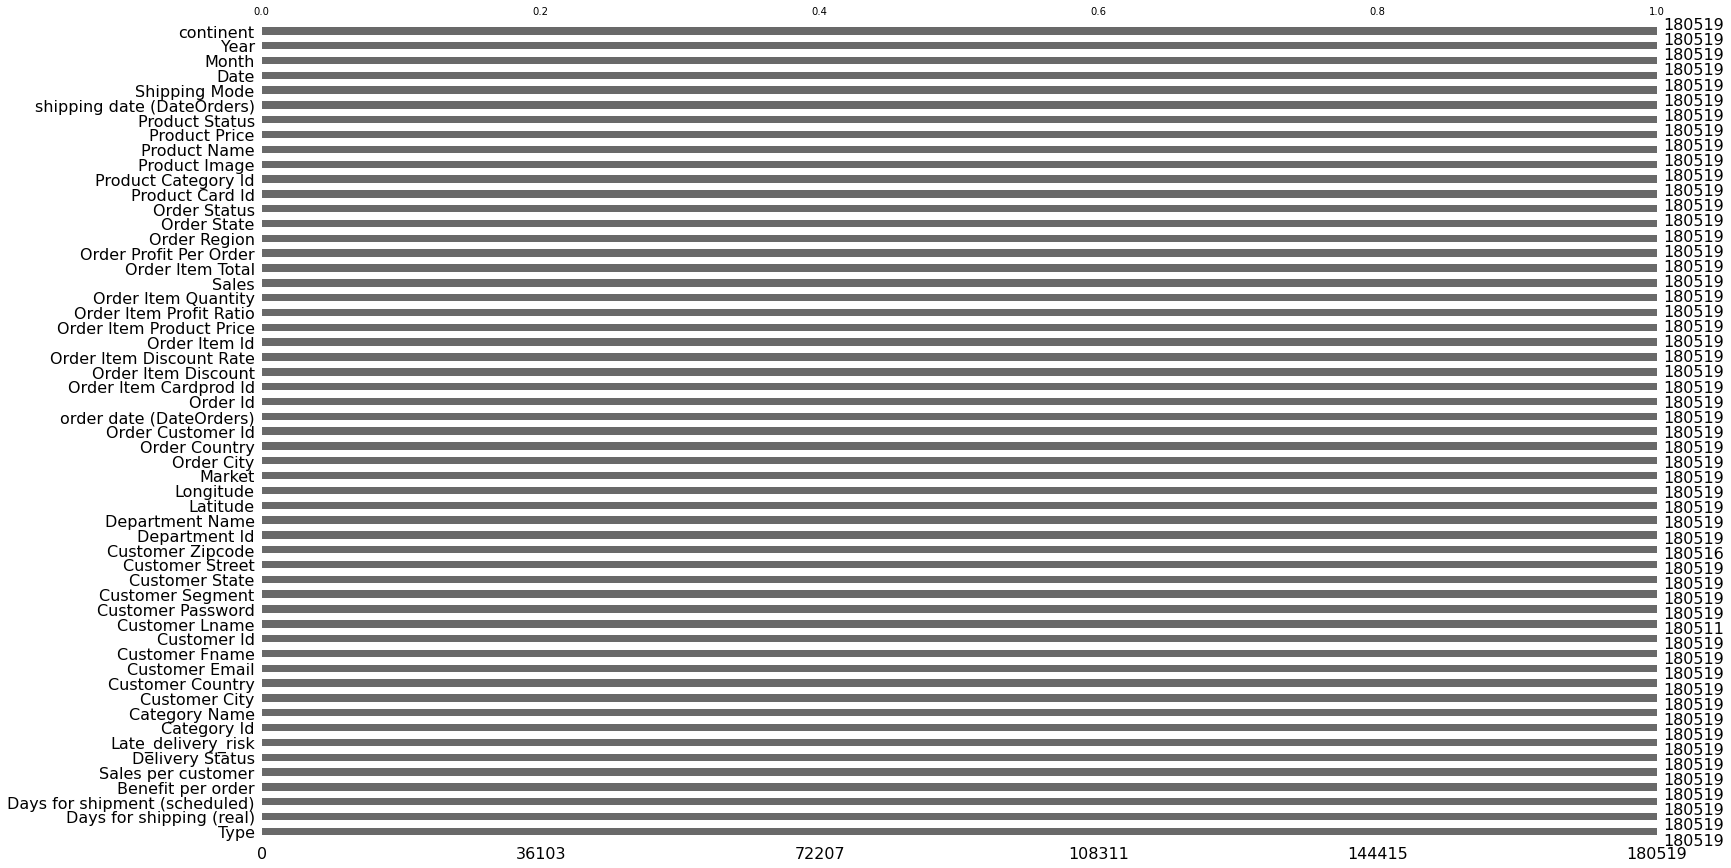

In [28]:
plt.figure(figsize = (10,4), facecolor = 'white')
msno.bar(data)
plt.yticks = 'white'
plt.xlabel = 'white'
plt.xticks = 'white'
plt.legend = True

As we can see, the columns ```order zipcode``` and ```Product Description``` have a lot of missing values,  therfore we will drop them.

In [8]:
data = data.drop(columns=['Order Zipcode','Product Description'])

In [9]:
data.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajast�n,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajast�n,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


# 1.  Feature engineering :
   

In [10]:
data['Date'] = data['shipping date (DateOrders)'].apply(lambda x :datetime.strptime(x.split(' ')[0], '%m/%d/%Y').date())

In [11]:
data['Month'] = data['Date'].apply(lambda x: int(str(x)[5:7]))

In [12]:
data['Year'] = data['Date'].apply(lambda x: int(str(x)[0:4]))

In [13]:
data['continent'] = data['Order Region'].apply(extract_cont)

In [14]:
data['Month'] = data['Month'].apply(lambda x: calendar.month_name[x])


# 2. figure: 
```Pie chart of sales per category per year```


In [16]:
fig2_data  = data[data['Year'] == 2018].groupby(by = 'Category Name').count().sort_values(by = 'Type').reset_index().head(10)

In [17]:
fig2_data['units sold per category'] = fig2_data['Type']

In [79]:
fig2 = px.pie(fig2_data, values='units sold per category', names='Category Name', color_discrete_sequence=px.colors.sequential.PuBu,
              hole = 0.6,
              height=400,
              width = 600)
fig2.update_traces(textposition='auto')

fig2.update_layout(uniformtext_minsize=15,
                   paper_bgcolor='rgb(105,105,105)',
                   uniformtext_mode='hide',
                   font = dict(color = 'white', family = "Arial"),
                    showlegend=True
                   )
fig2.show()

# 3.Figure
``` revenue per year (per month) plot per continent per year```


In [19]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Image',
       'Product Na

In [20]:
data['Order Region'].unique()

array(['Southeast Asia', 'South Asia', 'Oceania', 'Eastern Asia',
       'West Asia', 'West of USA ', 'US Center ', 'West Africa',
       'Central Africa', 'North Africa', 'Western Europe',
       'Northern Europe', 'Central America', 'Caribbean', 'South America',
       'East Africa', 'Southern Europe', 'East of USA', 'Canada',
       'Southern Africa', 'Central Asia', 'Eastern Europe',
       'South of  USA '], dtype=object)

# 3. Total profits per month per continent

In [21]:
continents = data['continent'].unique().tolist()


In [22]:
fig3 = go.Figure()
continents = ['Oceania', 'Africa', 'Europe','Asia','USA']
for cont, color in zip(continents, px.colors.sequential.PuBu):
    fig3_data  = data[(data['Year'] == 2016) & (data['continent'] == cont)].groupby(by = ['Month']).sum().sort_values(by = 'Month', key = month_sorter).reset_index()
    fig3.add_trace(go.Bar(
        x = fig3_data['Month'],
        y = fig3_data['Order Profit Per Order'],
        name = cont,
        marker_color = color,
        width = 0.2
        
        
    ))
fig3.update_traces( marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)    
        
fig3.update_layout(barmode='group', xaxis_tickangle=-45)

fig3.update_layout( title="Total profits per month per continent",
                    xaxis_title="Months",
                    yaxis_title="Profit ($)",
                    uniformtext_minsize=12,
                    paper_bgcolor='rgb(105,105,105)',
                    plot_bgcolor='rgb(105,105,105)',
                    uniformtext_mode='hide',
                    font = dict(color = 'white', family = "Arial"),
                    bargap= 0.3,
                    height = 400,
                    width = 1000
                    )
fig3.show()

# 5. Total Profit per Month

In [24]:
fig5 = go.Figure()
for year, color in zip(sorted(data['Year'].unique().tolist()), px.colors.sequential.PuBu):
    fig5_data = data[(data['Year'] == year)].groupby(by = ['Month']).sum().sort_values(by = 'Month', key = month_sorter).reset_index()
    fig5.add_trace(go.Scatter(
        x = fig5_data['Month'],
        y = fig5_data['Order Profit Per Order'],
        name = year,
        marker_color = color,
        
    ))
fig5.update_layout( title=" Total Profit per month",
                    xaxis_title="Months",
                    yaxis_title="Profit ($)",
                    uniformtext_minsize=12,
                    paper_bgcolor='rgb(105,105,105)',
                    plot_bgcolor='rgb(105,105,105)',
                    uniformtext_mode='hide',
                    font = dict(color = 'white', family = "Arial"),
                    height = 400,
                    width = 800,
                   
                    )
fig5.show()

In [26]:
fig7 = go.Figure()
fig7.add_trace( go.Indicator(
    mode = "number",
    value = sum(data['Order Profit Per Order']),
    number = {'prefix': "$"},
    title = {"text": "<span style='font-size:2em;color:white'>Total profit</span>"},
    domain = {'x': [1, 1], 'y': [0, 1]}))

fig7.update_layout( 
                    uniformtext_minsize=12,
                    paper_bgcolor='rgb(105,105,105)',
                    uniformtext_mode='hide',
                    font = dict(color = 'pink', family = "Arial"),
                    height = 400,
                    width = 400
                    )
               
fig7.show()

In [ ]:
def total_shipped_kpi(category,year,data = data):
    data = data[data['Category Name'].isin(category)]
    data = data[data['Year'] == year]
    fig = go.Figure()
    fig.add_trace( go.Indicator(
    mode = "number",
    value = len(data['Order Id'].unique()),
    title = {"text": "<span style='font-size:2em;color:white'>Fullfiled orders</span>"},
    domain = {'x': [1, 1], 'y': [0, 1]}))

    fig.update_layout( 
                        uniformtext_minsize=12,
                        paper_bgcolor='rgb(105,105,105)',
                        uniformtext_mode='hide',
                        font = dict(color = 'pink', family = "Arial"),
                        height = 400,
                        width = 400
                        )
    return fig.show()   

In [30]:
def total_profit_kpi(category,year,data = data):
    data = data[data['Category Name'].isin(category)]
    data = data[data['Year'] == year]
    fig = go.Figure()
    fig.add_trace( go.Indicator(
    mode = "number",
    value = sum(data['Order Profit Per Order']),
    number = {'prefix': "$"},
    title = {"text": "<span style='font-size:2em;color:white'>Total profit</span>"},
    domain = {'x': [1, 1], 'y': [0, 1]}))
    
    fig.update_layout( 
                        uniformtext_minsize=12,
                        paper_bgcolor='rgb(105,105,105)',
                        uniformtext_mode='hide',
                        font = dict(color = 'pink', family = "Arial"),
                        height = 400,
                        width = 400
                        )
               
    return fig

In [44]:
def line_fig(year, data=data):
    fig = go.Figure()
    for year, color in zip(sorted(year), px.colors.sequential.PuBu):
        fig_data = data[(data['Year'] == year)].groupby(by = ['Month']).sum().sort_values(by = 'Month', key = month_sorter).reset_index()
        fig.add_trace(go.Scatter(
        x = fig_data['Month'],
        y = fig_data['Order Profit Per Order'],
        name = year,
        marker_color = color,
        
        ))
    fig.update_layout( title=" Total Profit per month",
                    xaxis_title="Months",
                    yaxis_title="Profit ($)",
                    uniformtext_minsize=12,
                    paper_bgcolor='rgb(105,105,105)',
                    plot_bgcolor='rgb(105,105,105)',
                    uniformtext_mode='hide',
                    font = dict(color = 'white', family = "Arial")
                    )
    return fig

In [50]:
def bar_total_profits(category, year ,data = data):
    fig = go.Figure()
    continents = ['Oceania', 'Africa', 'Europe','Asia','USA']
    for cont, color in zip(continents, px.colors.sequential.PuBu):
        fig_data  = data[(data['Year'] == year) & (data['continent'] == cont)].groupby(by = ['Month']).sum().sort_values(by = 'Month', key = month_sorter).reset_index()
        fig.add_trace(go.Bar(
            x = fig_data['Month'],
            y = fig_data['Order Profit Per Order'],
            name = cont,
            marker_color = color,
            width = 0.2))
        
    fig.update_traces( marker_line_color='rgb(8,48,107)',
                       marker_line_width=1.5, opacity=0.6)    
        
    fig.update_layout(barmode='group', xaxis_tickangle=-45)

    fig.update_layout( title="Total profits per month per continent",
                    xaxis_title="Months",
                    yaxis_title="Profit ($)",
                    uniformtext_minsize=12,
                    paper_bgcolor='rgb(105,105,105)',
                    plot_bgcolor='rgb(105,105,105)',
                    uniformtext_mode='hide',
                    font = dict(color = 'white', family = "Arial"),
                    bargap= 0.3,
                    height = 400,
                    width = 1000
                    )
    return fig

In [92]:
def category_pie(year): 
    fig_data  = data[data['Year']==year].groupby(by = 'Category Name').count().sort_values(by = 'Type').reset_index().head(10)
    fig_data['units sold per category'] = fig_data['Type']
    fig = px.pie(fig_data, values='units sold per category', names='Category Name', color_discrete_sequence=px.colors.sequential.PuBu,
                    hole = 0.7,
                    height=600,
                    width = 500)  
    fig.update_traces(textposition='outside')
    fig.update_layout(uniformtext_minsize=12,
                           paper_bgcolor='rgb(105,105,105)',
                           uniformtext_mode='hide',
                           font = dict(color = 'white', family = "Arial"),
                           showlegend = False)
    return fig
